In [2]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
isw_data = pd.read_csv('isw_report.csv')
isw_data.head(5)

,Unnamed: 0,date,title,full_url,main_html,main_text,lemmatized_text,tf-idf,sorted tf-idf
0,0,2022-02-24,Russia-Ukraine Warning Update: Initial Russian...,/backgrounder/russia-ukraine-warning-update-in...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'russian': 0.40944833180236245, 'force': 0.38..."
1,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0.028449952800024533...","{'force': 0.4154198758637278, 'russian': 0.395..."
2,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Katya Stepanen...","['mason', 'clark', 'george', 'barros', 'katya'...","{'abachev': 0, 'abandon': 0.0206133346198782, ...","{'force': 0.41779392480185634, 'russian': 0.40..."
3,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'force': 0.42608199344801345, 'russian': 0.39..."
4,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'february': 0.47719693783492917, 'russian': 0..."


In [16]:
vectorizer = TfidfVectorizer(max_features=400)

In [17]:
X = vectorizer.fit_transform(isw_data['lemmatized_text'])

In [18]:
features_names = vectorizer.get_feature_names_out()

In [20]:
tfidf_data = pd.DataFrame(X.toarray(), columns=features_names)

In [21]:
tfidf_data.head(5)

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
0,0.015719,0.000000,0.0,0.027474,0.027023,0.0,0.0,0.125395,0.0,0.151610,...,0.031219,0.066306,0.000000,0.020069,0.000000,0.000000,0.012225,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.021419,0.000000,0.0,0.0,0.097756,0.0,0.072734,...,0.048675,0.051691,0.011265,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.008591,0.008622,0.0,0.022525,0.029540,0.0,0.0,0.147618,0.0,0.050994,...,0.051189,0.036241,0.015795,0.010969,0.018480,0.000000,0.020046,0.000000,0.0,0.0
3,0.007920,0.007948,0.0,0.069212,0.040845,0.0,0.0,0.131215,0.0,0.076386,...,0.062915,0.047724,0.021840,0.000000,0.000000,0.012241,0.018478,0.000000,0.0,0.0
4,0.000000,0.008614,0.0,0.075008,0.029511,0.0,0.0,0.110603,0.0,0.108254,...,0.034092,0.087926,0.007890,0.000000,0.006154,0.000000,0.026701,0.030205,0.0,0.0


In [24]:
tfidf_data.tail(5)

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
325,0.012754,0.019201,0.032863,0.000000,0.021927,0.010015,0.014555,0.015654,0.004235,0.000000,...,0.021109,0.023058,0.000000,0.016284,0.018290,0.004929,0.039679,0.031420,0.007198,0.060908
326,0.010456,0.010494,0.033676,0.000000,0.000000,0.008210,0.007955,0.006416,0.000000,0.015516,...,0.006922,0.025204,0.000000,0.000000,0.014994,0.000000,0.032529,0.014719,0.000000,0.000000
327,0.000000,0.029080,0.029863,0.005065,0.009963,0.022751,0.017635,0.017781,0.003848,0.000000,...,0.019182,0.024445,0.000000,0.007399,0.008310,0.008957,0.000000,0.081577,0.006541,0.000000
328,0.011503,0.011545,0.051868,0.000000,0.000000,0.045161,0.013127,0.042354,0.003819,0.004267,...,0.022846,0.020796,0.005287,0.000000,0.024744,0.008890,0.017893,0.048579,0.000000,0.000000
329,0.038914,0.014646,0.021933,0.004251,0.004181,0.011458,0.014802,0.035819,0.003230,0.010827,...,0.022542,0.055694,0.017886,0.000000,0.010463,0.003759,0.015133,0.061627,0.005491,0.006637


In [27]:
new_isw_data = pd.merge(isw_data, tfidf_data, left_index=True, right_index=True)

In [28]:
new_isw_data.head(5)

,Unnamed: 0,date,title,full_url,main_html,main_text,lemmatized_text,tf-idf,sorted tf-idf,across,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
0,0,2022-02-24,Russia-Ukraine Warning Update: Initial Russian...,/backgrounder/russia-ukraine-warning-update-in...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'russian': 0.40944833180236245, 'force': 0.38...",0.015719,...,0.031219,0.066306,0.000000,0.020069,0.000000,0.000000,0.012225,0.000000,0.0,0.0
1,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0.028449952800024533...","{'force': 0.4154198758637278, 'russian': 0.395...",0.000000,...,0.048675,0.051691,0.011265,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Katya Stepanen...","['mason', 'clark', 'george', 'barros', 'katya'...","{'abachev': 0, 'abandon': 0.0206133346198782, ...","{'force': 0.41779392480185634, 'russian': 0.40...",0.008591,...,0.051189,0.036241,0.015795,0.010969,0.018480,0.000000,0.020046,0.000000,0.0,0.0
3,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'force': 0.42608199344801345, 'russian': 0.39...",0.007920,...,0.062915,0.047724,0.021840,0.000000,0.000000,0.012241,0.018478,0.000000,0.0,0.0
4,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'february': 0.47719693783492917, 'russian': 0...",0.000000,...,0.034092,0.087926,0.007890,0.000000,0.006154,0.000000,0.026701,0.030205,0.0,0.0


In [29]:
delete_columns = ['Unnamed: 0', 'title', 'full_url', 'main_html', 'lemmatized_text', 'tf-idf',  'sorted tf-idf']
new_isw_data.drop(columns=delete_columns, inplace=True)

In [37]:
new_isw_data['date'] = pd.to_datetime(new_isw_data['date'])

In [39]:
new_isw_data.set_index(new_isw_data['date'], inplace=True)

In [42]:
new_isw_data.drop(columns=['date'], inplace=True)

<h1>Tf-Idf Graphics</h1>

In [44]:
random_day = new_isw_data.sample(1)

In [45]:
new_isw_data.sample(1)

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
date,,,,,,,,,,,,,,,,,,,,,
2022-03-26,0.041489,0.0,0.026725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029748,0.032064,0.0,0.0,0.0,0.0


In [58]:
rand_df = pd.DataFrame(new_isw_data.iloc[0])

In [59]:
sorted_df = rand_df.sort_values(by='2022-02-24', ascending=False).head(20)

<Axes: title={'center': 'random day tf-idf words'}, xlabel='words', ylabel='tf-idf'>

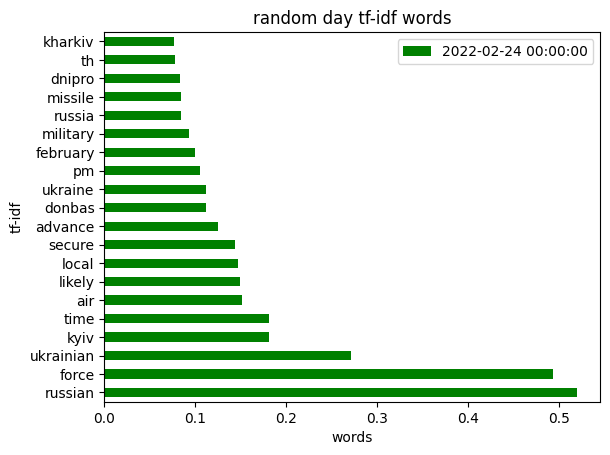

In [69]:
sorted_df.plot.barh(color='green', ylabel = 'tf-idf', xlabel='words', legend=['tf-idf'], title='random day tf-idf words')

<Axes: title={'center': 'Kyiv in isw reports'}, xlabel='date'>

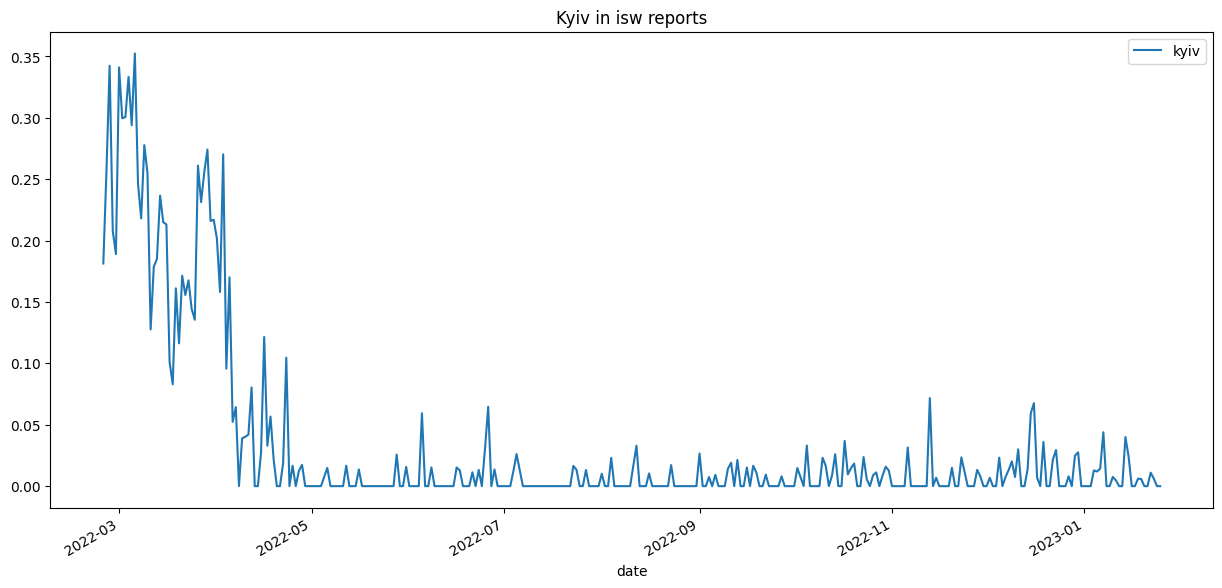

In [73]:
kyiv = new_isw_data['kyiv']
kyiv.plot.line(figsize=(15, 7), title='Kyiv in isw reports', y='tf-idf', legend=True)

In [80]:
figsize = figsize=(15, 7)

<Axes: title={'center': 'Donbas in isw reports'}, xlabel='date'>

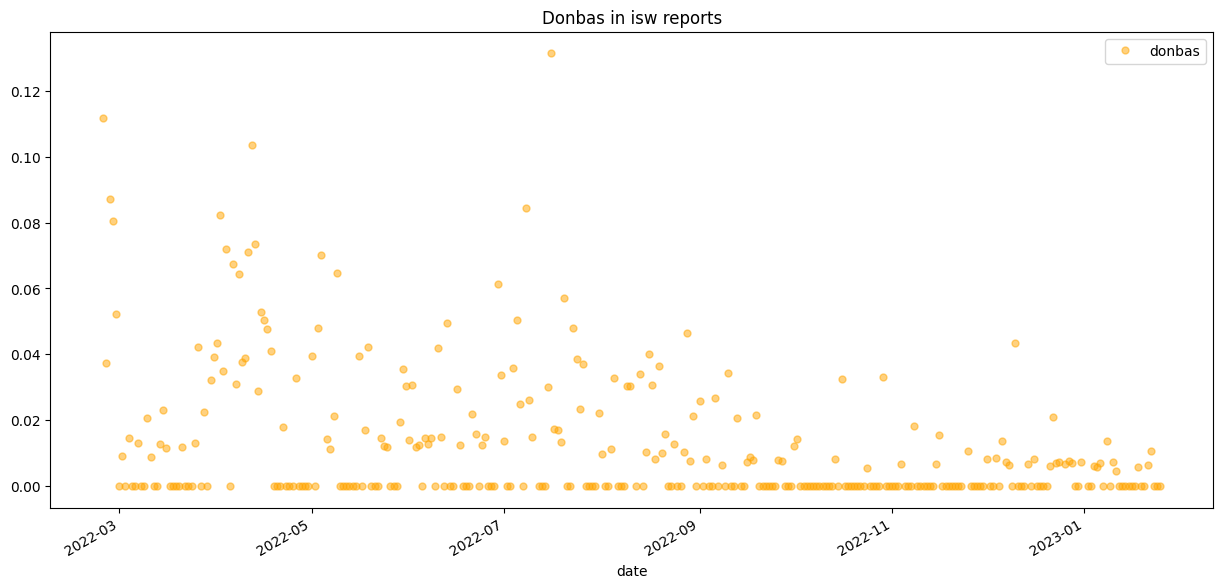

In [81]:
donbas = new_isw_data['donbas']
donbas.plot(style='o', alpha=0.5, ms=5, color='orange', legend=True, title='Donbas in isw reports', figsize=figsize)

In [84]:
monthly_data = new_isw_data[['donbas', 'kharkiv', 'zaporizhzhia', 'crimea']].resample('M').mean()

<Axes: title={'center': 'mentions of regions and cities'}, xlabel='date'>

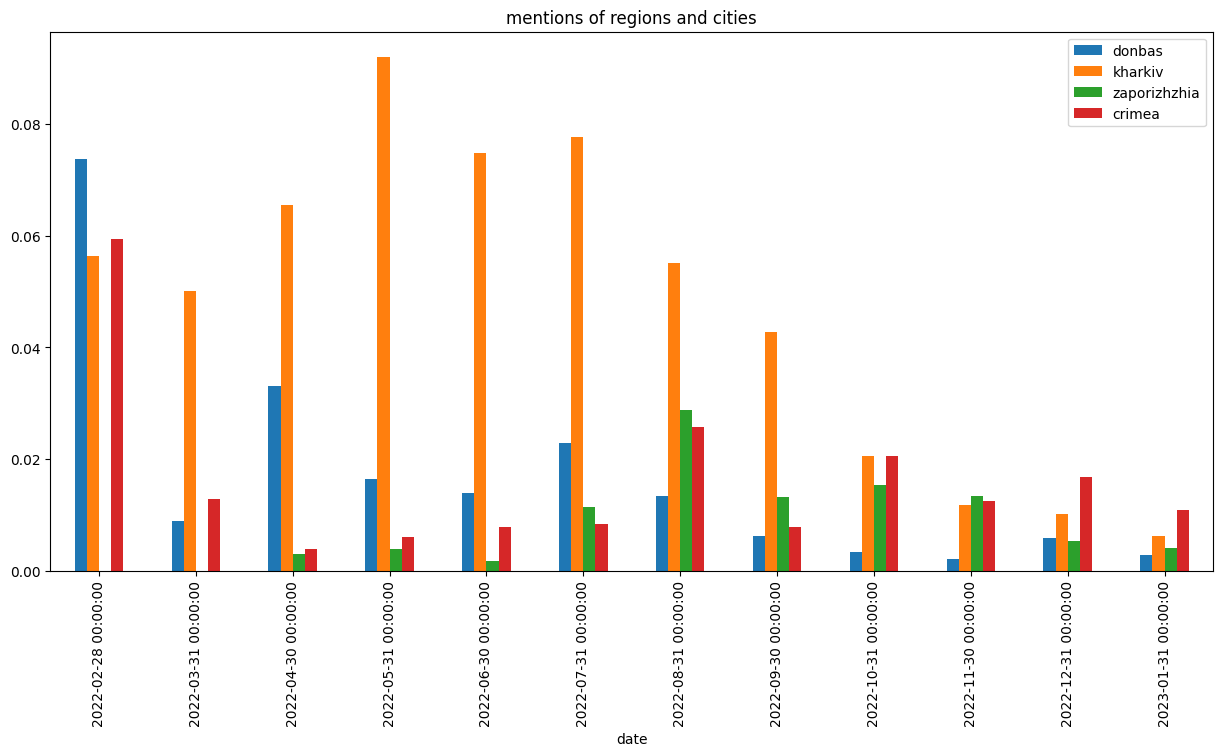

In [93]:
monthly_data.plot.bar(figsize=figsize, legend=True, title='mentions of regions and cities')

In [94]:
weakly_data = new_isw_data.resample('W').mean()
weakly_data.head(3)

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
date,,,,,,,,,,,,,,,,,,,,,
2022-02-27,0.008057,0.004143,0.000000,0.035157,0.024352,0.000000,0.0,0.125496,0.000000,0.087931,...,0.048500,0.050491,0.012225,0.00776,0.004620,0.003060,0.012687,0.000000,0.0,0.000000
2022-03-06,0.007472,0.001231,0.004296,0.022789,0.016302,0.001001,0.0,0.091908,0.001371,0.050097,...,0.107519,0.025486,0.001127,0.00000,0.019314,0.002581,0.030207,0.006194,0.0,0.011264
2022-03-13,0.006654,0.003893,0.003750,0.015668,0.027792,0.000000,0.0,0.064546,0.000000,0.024691,...,0.051230,0.029923,0.006563,0.00000,0.016573,0.009404,0.018762,0.007843,0.0,0.000000


<Axes: title={'center': 'attack, missile, force mentions'}, xlabel='date', ylabel='tf-idf'>

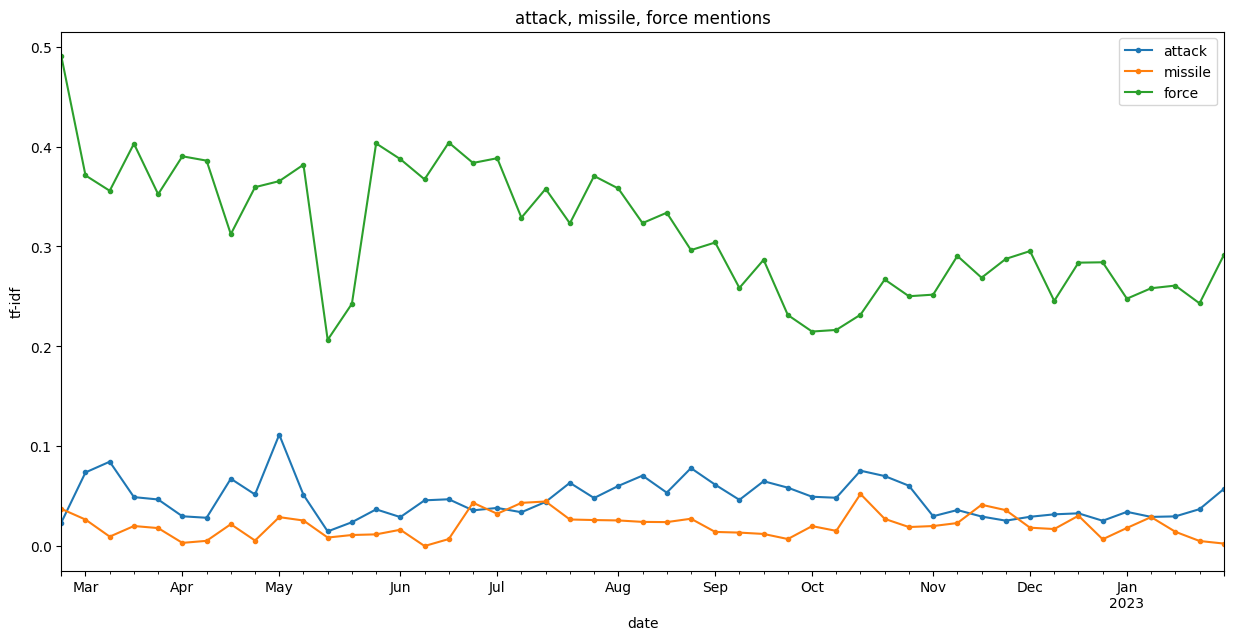

In [96]:
weakly_data['attack'].plot.line(figsize=figsize, marker='.', markersize=6, label='attack', ylabel='tf-idf', title='attack, missile, force mentions', legend=True)
weakly_data['missile'].plot.line(figsize=figsize, marker='.', markersize=6, label='missile', legend=True)
weakly_data['force'].plot.line(figsize=figsize, marker='.', markersize=6, label='force', legend=True)

<h1>Test data and train</h1>